<a href="https://colab.research.google.com/github/singaravelan/TensorFlow_programming/blob/main/4.%20HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension to the data (required for Conv2D layers)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Shuffle and batch the datasets
batch_size = 32
train_ds = train_ds.shuffle(buffer_size=60000).batch(batch_size)
test_ds = test_ds.batch(batch_size)

# Display dataset information
print("Number of training examples:", len(x_train))
print("Number of test examples:", len(x_test))
print("Input shape:", x_train[0].shape)
print("Number of classes:", len(set(y_train)))

# Example of using the dataset
for images, labels in train_ds.take(1):
    print("Batch shape:", images.shape)
    print("Labels shape:", labels.shape)

Number of training examples: 60000
Number of test examples: 10000
Input shape: (28, 28, 1)
Number of classes: 10
Batch shape: (32, 28, 28, 1)
Labels shape: (32,)


In [ ]:
def plot_images(image_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

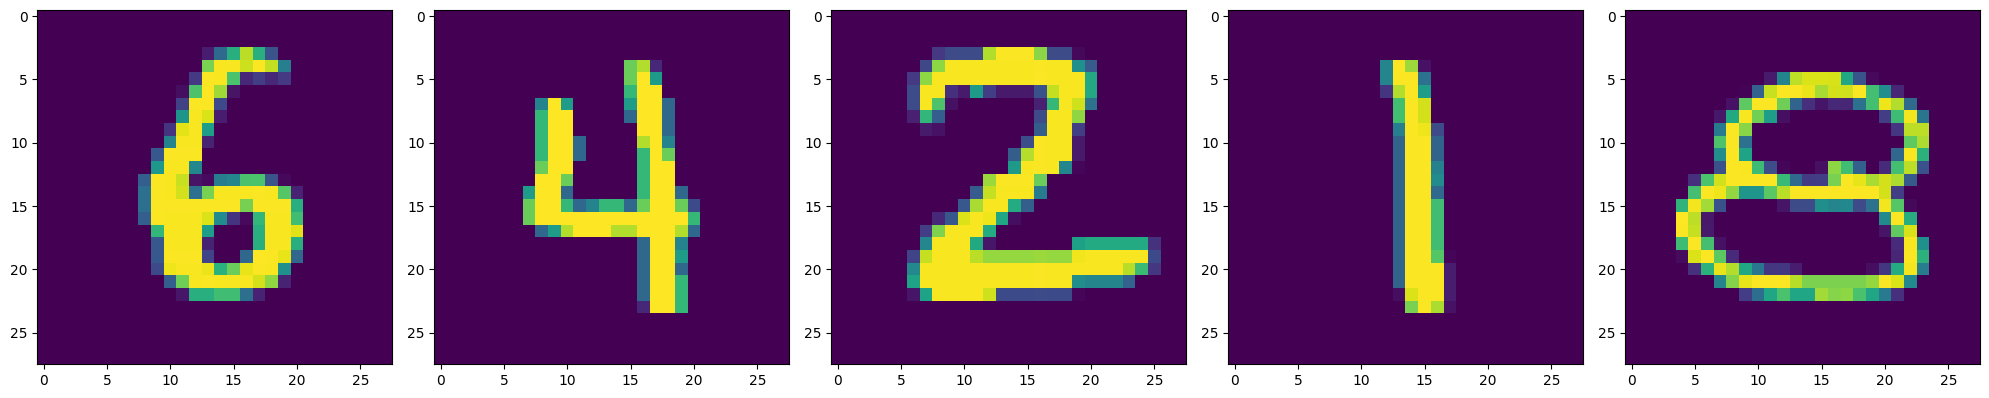

In [ ]:
for images, labels in train_ds.take(1):
    plot_images(images.numpy())

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming 5 classes, change to your actual number of classes
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 1600)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=10)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=test_ds,
    callbacks=[callback]
)

Epoch 1/100


/Users/singaravelang/Documents/Learning/ml_env/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 13s 7ms/step - loss: 0.1429 - accuracy: 0.9554 - val_loss: 0.0435 - val_accuracy: 0.9856
Epoch 2/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0287 - val_accuracy: 0.9897
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.0283 - val_accuracy: 0.9912
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0250 - val_accuracy: 0.9913
Epoch 5/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0228 - val_accuracy: 0.9924
Epoch 6/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 7/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0230 - val_accurac

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pathlib

# Replace '/tmp/images' with the actual path to your directory containing test images
image_directory = pathlib.Path('/tmp/images')
images = os.listdir(image_directory)

for i in images:
    # predicting images
    path = os.path.join(image_directory, i)
    img = load_img(path, target_size=(28, 28), color_mode='grayscale')  # Adjust target_size and color_mode as needed
    x = img_to_array(img)
    x /= 255.0
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    # Assuming it's a classification task, you can get the predicted class index
    predicted_class = np.argmax(classes, axis=1)[0]

    print(f"Image: {i}, Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 108ms/step
Image: Unknown.png, Predicted Class: 3
1/1 [==============================] - 0s 8ms/step
Image: imagess.png, Predicted Class: 3
1/1 [==============================] - 0s 8ms/step
Image: Unknown.jpeg, Predicted Class: 8
1/1 [==============================] - 0s 8ms/step
Image: images.png, Predicted Class: 2
